# Explore here

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(client_id)
print(client_secret)



ca2b10e60f5b47948569e6d413f3a880
8a8c40d704f947b599ae4ce1d502cfb0


In [3]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
! pip install spotipy --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

artist_id = '7t0rwkOPGlDPEhaOcVtOt9'
con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))


In [51]:
lz_uri = 'spotify:artist:7t0rwkOPGlDPEhaOcVtOt9'

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))
results = con.artist_top_tracks(lz_uri)   #Dictionary with the tracks 

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    duration_min= track['duration_ms']/60000
    print(f'duration_minutes: {duration_min:.2f}')
    popularity= track['popularity']
    print(f'Popularity: {popularity}')
    print()

   

track    : Linger
duration_minutes: 4.58
Popularity: 82

track    : Zombie
duration_minutes: 5.11
Popularity: 82

track    : Dreams
duration_minutes: 4.53
Popularity: 77

track    : Ode To My Family
duration_minutes: 4.53
Popularity: 71

track    : Sunday
duration_minutes: 3.52
Popularity: 69

track    : When You're Gone
duration_minutes: 4.94
Popularity: 64

track    : Animal Instinct
duration_minutes: 3.52
Popularity: 63

track    : Zombie (Acoustic Version)
duration_minutes: 4.03
Popularity: 63

track    : Just My Imagination
duration_minutes: 3.69
Popularity: 61

track    : When You're Gone
duration_minutes: 3.87
Popularity: 61



In [52]:
# Dataframe Top tracks
tracks_df = pd.DataFrame([{
    "Name": track['name'],
    "Duration (minutes)": track['duration_ms'] / 60000,  # Convert ms to  minutes
    "Popularity": track['popularity']
} for track in results['tracks']])  #  access to the list

# Show top 3 rows
print(tracks_df.head(5))

               Name  Duration (minutes)  Popularity
0            Linger            4.578433          82
1            Zombie            5.107333          82
2            Dreams            4.526000          77
3  Ode To My Family            4.525550          71
4            Sunday            3.517767          69


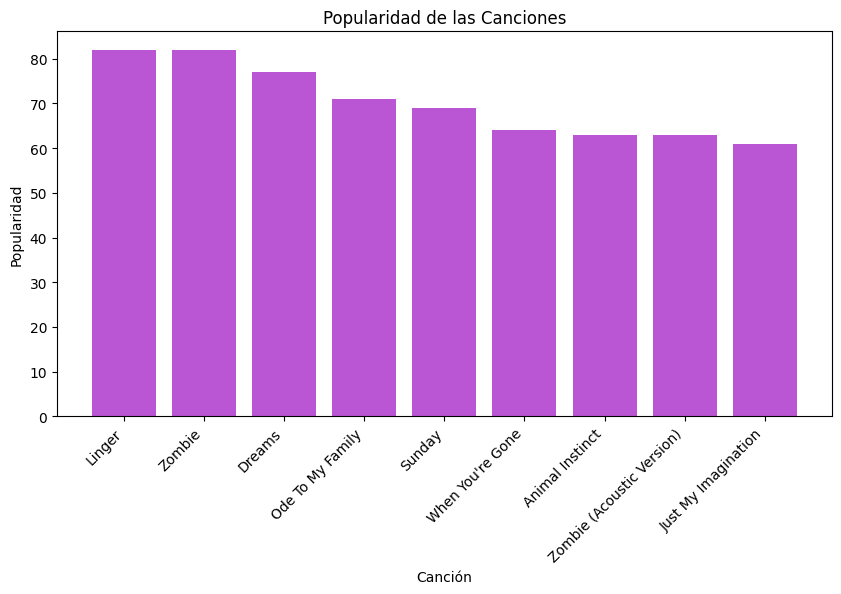

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(tracks_df["Name"], tracks_df["Popularity"], color="mediumorchid")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Canción")
plt.ylabel("Popularidad")
plt.title("Popularidad de las Canciones")
plt.show()

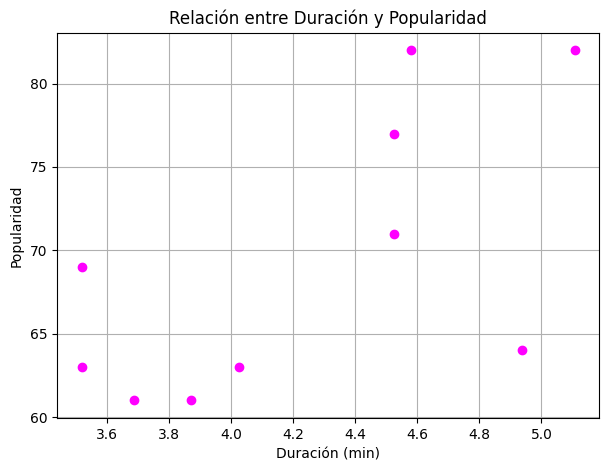

In [56]:
plt.figure(figsize=(7, 5))
plt.scatter(tracks_df["Duration (minutes)"], tracks_df["Popularity"], color="magenta")
plt.xlabel("Duración (min)")
plt.ylabel("Popularidad")
plt.title("Relación entre Duración y Popularidad")
plt.grid()
plt.show()

Podemos ver una relacion lineal respecto a la duración en minutos de la canción respecto a la popularidad de la misma, entre mayor sea la duración de la misma más probabilidad a que sea popular. 